In [2]:
import pandas as pd
from pycaret.classification import *

In [3]:
# Load your dataset
data = pd.read_csv("train_data_feature_selected.csv")
data.head()

,A2ML1,ABCA12,ACHE,ADIPOQ,ADRA2A,AK5,AKR1B15,AKR7A3,ALDH1A1,ALDH1L1,...,WDR72,WFDC5,WT1,XK,XKRX,ZNF454,ZNF488,ZNHIT2,ZSCAN23,X_primary_disease
0,12.04,1.83,3.38,9.03,4.95,1.83,0.89,5.38,6.81,3.49,...,0.51,0.0,2.00,7.64,4.59,5.96,6.82,7.58,1.65,0
1,5.07,9.41,4.96,8.41,9.63,7.05,6.60,6.51,9.90,9.15,...,6.12,0.5,6.94,3.14,3.00,3.33,2.10,8.57,3.00,0
2,2.47,5.29,5.53,8.70,7.91,9.17,4.82,10.03,8.88,5.18,...,3.91,0.5,3.15,5.71,2.93,4.33,3.21,8.72,3.91,0
3,1.52,7.63,2.53,9.11,8.86,7.27,3.66,7.20,9.49,3.51,...,7.62,0.0,5.94,2.83,2.83,4.65,2.53,5.74,5.99,0
4,7.57,7.03,5.42,8.33,8.27,9.54,8.99,7.72,9.32,5.18,...,3.97,0.0,0.55,4.17,3.88,4.34,5.03,7.93,4.61,0


In [4]:
data.isnull().sum().sort_values(ascending = False)

A2ML1                0
MAGEA4               0
QRFPR                0
PYDC1                0
PTH2R                0
                    ..
GPAT2                0
GLB1L3               0
GJD3                 0
GJB7                 0
X_primary_disease    0
Length: 321, dtype: int64

* As data is already transformed, let's not normalize.
* And in our EDA we found that target variable is unbalanced hence let's try to fix it.

In [5]:
# Initialize PyCaret
exp_clf = setup(data, target='X_primary_disease', session_id=123, normalize=False, fix_imbalance=True)


,Description,Value
0,Session id,123
1,Target,X_primary_disease
2,Target type,Multiclass
3,Original data shape,"(1514, 321)"
4,Transformed data shape,"(2339, 321)"
5,Transformed train set shape,"(1884, 321)"
6,Transformed test set shape,"(455, 321)"
7,Numeric features,320
8,Preprocess,True
9,Imputation type,simple


In [6]:
# Compare models and select the best ones
best_models = compare_models(n_select=3, fold=5, sort='F1')


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [7]:
best_models


[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, positive=False, random_state=123, solver='auto',
                 tol=0.0001)]

In [8]:
pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9877,0.9993,0.9877,0.9884,0.9877,0.9783,0.9785,9.810
lda,Linear Discriminant Analysis,0.9877,0.9984,0.9877,0.9883,0.9877,0.9783,0.9785,2.316
ridge,Ridge Classifier,0.9868,0.0000,0.9868,0.9874,0.9868,0.9766,0.9768,2.030
svm,SVM - Linear Kernel,0.9858,0.0000,0.9858,0.9864,0.9858,0.9749,0.9752,2.158
catboost,CatBoost Classifier,0.9830,0.9992,0.9830,0.9841,0.9829,0.9699,0.9704,185.274
et,Extra Trees Classifier,0.9811,0.9988,0.9811,0.9821,0.9810,0.9665,0.9670,2.498
gbc,Gradient Boosting Classifier,0.9802,0.9992,0.9802,0.9813,0.9801,0.9649,0.9653,29.014
xgboost,Extreme Gradient Boosting,0.9802,0.9994,0.9802,0.9816,0.9801,0.9649,0.9655,4.906
knn,K Neighbors Classifier,0.9792,0.9942,0.9792,0.9800,0.9792,0.9632,0.9635,4.660
lightgbm,Light Gradient Boosting Machine,0.9792,0.9992,0.9792,0.9803,0.9792,0.9632,0.9636,7.638


In [9]:
tuned_models = [tune_model(model) for model in best_models]


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9811,1.0000,0.9811,0.9827,0.9811,0.9666,0.9672
1,0.9623,0.9975,0.9623,0.9681,0.9619,0.9331,0.9355
2,0.9906,0.9999,0.9906,0.9910,0.9906,0.9833,0.9834
3,0.9717,0.9988,0.9717,0.9721,0.9717,0.9499,0.9500
4,0.9811,0.9988,0.9811,0.9828,0.9811,0.9666,0.9672
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9906,0.9998,0.9906,0.9910,0.9906,0.9835,0.9837


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9906,0.9991,0.9906,0.9910,0.9906,0.9833,0.9834
1,0.9623,0.9975,0.9623,0.9681,0.9619,0.9331,0.9355
2,0.9906,0.9998,0.9906,0.9910,0.9906,0.9833,0.9834
3,0.9811,0.9993,0.9811,0.9811,0.9811,0.9666,0.9666
4,0.9811,0.9981,0.9811,0.9828,0.9811,0.9666,0.9672
5,0.9906,1.0000,0.9906,0.9910,0.9906,0.9833,0.9834
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9906,0.9985,0.9906,0.9910,0.9906,0.9835,0.9837


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9906,0.0000,0.9906,0.9910,0.9906,0.9833,0.9834
1,0.9623,0.0000,0.9623,0.9681,0.9619,0.9331,0.9355
2,0.9906,0.0000,0.9906,0.9910,0.9906,0.9833,0.9834
3,0.9717,0.0000,0.9717,0.9721,0.9717,0.9499,0.9500
4,0.9811,0.0000,0.9811,0.9828,0.9811,0.9666,0.9672
5,0.9906,0.0000,0.9906,0.9910,0.9906,0.9833,0.9834
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9906,0.0000,0.9906,0.9910,0.9906,0.9835,0.9837


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [10]:
tuned_models

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=0.2, solver='eigen',
                            store_covariance=False, tol=0.0001),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, positive=False, random_state=123, solver='auto',
                 tol=0.0001)]

In [34]:
from sklearn.metrics import classification_report

for model in tuned_models:
    predictions = predict_model(model)
    print(classification_report(predictions['X_primary_disease'], predictions['prediction_label']))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       0.94      0.99      0.96        95
           2       0.99      0.93      0.96        91

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.99      0.98      0.98       455



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.9824,0.9973,0.9824,0.9832,0.9825,0.9690,0.9693


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       0.93      0.99      0.96        95
           2       0.99      0.93      0.96        91

    accuracy                           0.98       455
   macro avg       0.97      0.97      0.97       455
weighted avg       0.98      0.98      0.98       455



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9824,0,0.9824,0.9827,0.9824,0.9690,0.9691


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       0.94      0.98      0.96        95
           2       0.98      0.93      0.96        91

    accuracy                           0.98       455
   macro avg       0.97      0.97      0.97       455
weighted avg       0.98      0.98      0.98       455



In [35]:
predictions = predict_model(tuned_models[0])
print(classification_report(predictions['X_primary_disease'], predictions['prediction_label']))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9846,0.9969,0.9846,0.9851,0.9846,0.9729,0.9731


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       0.94      0.99      0.96        95
           2       0.99      0.93      0.96        91

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.99      0.98      0.98       455



In [15]:
predictions

,A2ML1,ABCA12,ACHE,ADIPOQ,ADRA2A,AK5,AKR1B15,AKR7A3,ALDH1A1,ALDH1L1,...,WFDC5,WT1,XK,XKRX,ZNF454,ZNF488,ZNHIT2,ZSCAN23,X_primary_disease,prediction_label
1187,1.07,6.89,1.30,9.73,8.70,3.00,1.50,10.43,7.50,3.94,...,0.00,7.65,7.63,3.30,2.62,1.07,7.90,5.54,0,0
806,0.00,7.86,5.30,0.00,6.23,2.23,6.03,3.33,9.74,1.59,...,0.00,4.98,5.87,10.07,2.43,5.79,7.69,3.07,1,1
1335,10.28,10.43,6.96,6.62,7.54,4.41,6.01,10.34,9.55,1.31,...,0.00,4.86,3.34,5.06,2.44,2.72,7.00,4.20,0,0
566,10.39,3.56,4.64,1.49,6.94,1.89,5.51,2.68,8.64,0.54,...,1.23,1.89,2.46,3.95,6.34,2.06,7.93,0.00,0,0
1441,2.60,3.14,6.26,0.55,3.75,5.36,2.71,6.93,9.71,11.64,...,0.55,1.72,5.54,1.72,4.77,4.17,8.02,0.55,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,2.13,5.86,3.07,6.64,7.84,9.84,1.01,10.36,8.71,4.13,...,0.00,0.42,8.17,4.24,3.23,3.01,9.08,3.29,0,0
280,1.87,7.80,4.80,4.65,10.02,8.77,0.29,9.37,10.48,1.47,...,1.35,7.46,7.20,4.22,4.06,2.65,0.00,5.98,0,0
1461,4.12,10.89,5.25,6.60,8.12,7.66,2.69,10.05,9.18,5.44,...,0.00,1.24,5.08,3.73,4.43,4.12,11.34,3.88,0,0
488,5.55,0.67,4.22,0.00,6.94,7.90,2.78,2.36,8.39,2.08,...,0.00,6.50,8.50,4.39,5.09,4.67,7.40,2.72,0,0


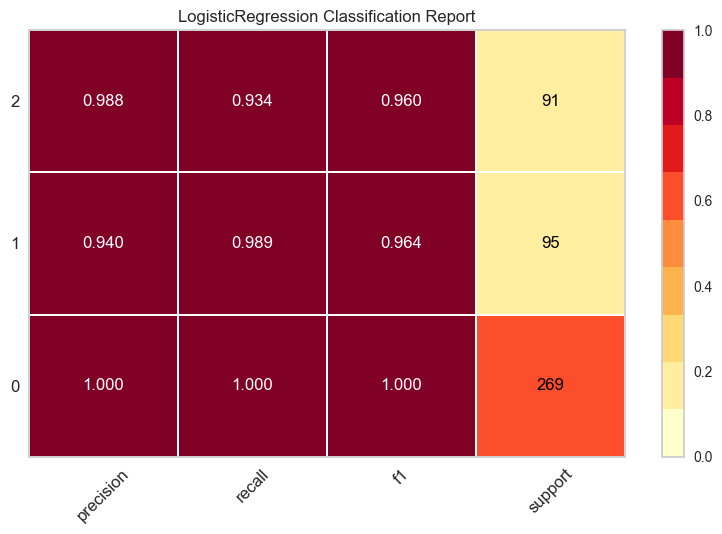

In [16]:
plot_model(tuned_models[0], plot='class_report')

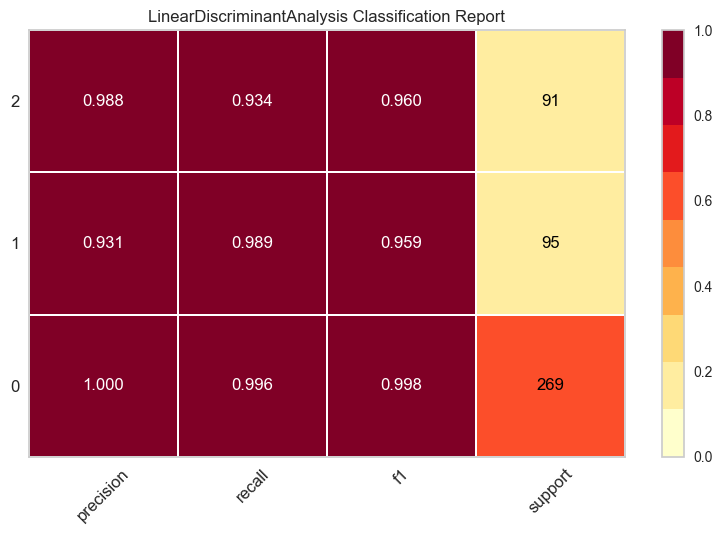

In [17]:
plot_model(tuned_models[1], plot='class_report')

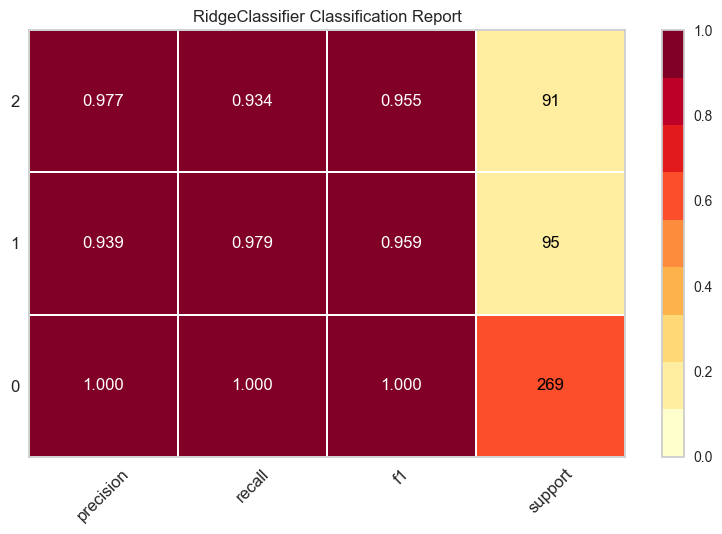

In [18]:
plot_model(tuned_models[2], plot='class_report')

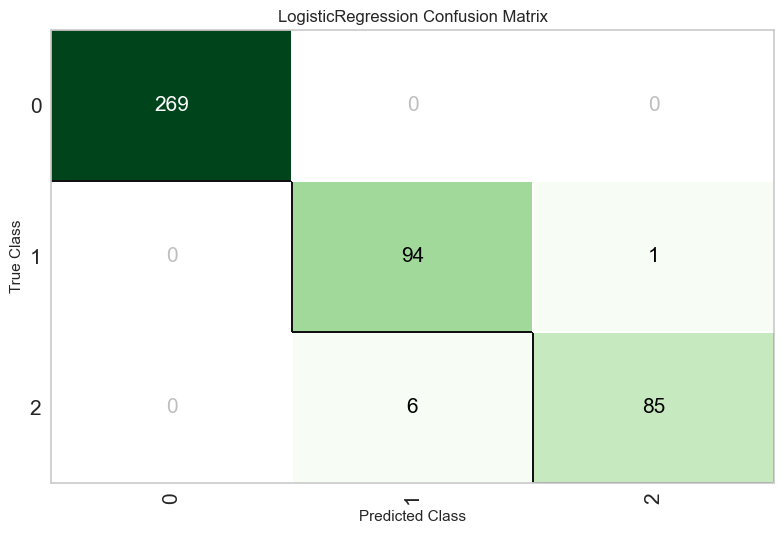

In [20]:
# Generate confusion matrix
confusion_matrix = plot_model(tuned_models[0], plot='confusion_matrix')


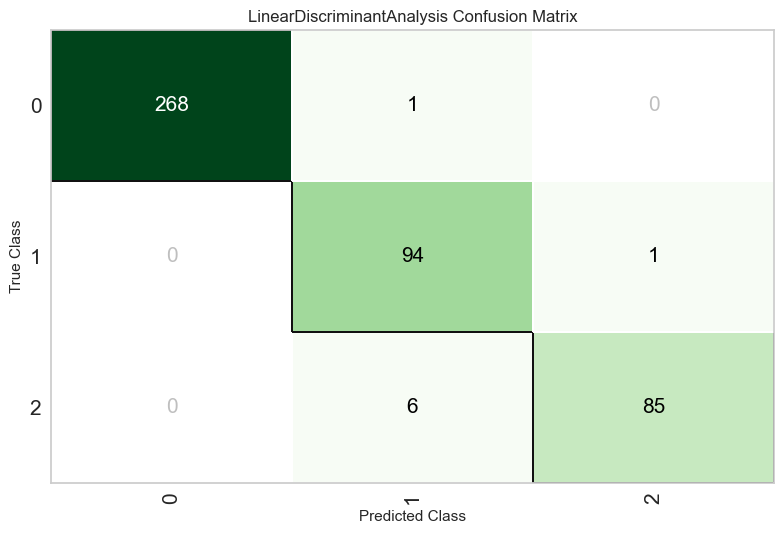

In [21]:
# Generate confusion matrix
confusion_matrix = plot_model(tuned_models[1], plot='confusion_matrix')

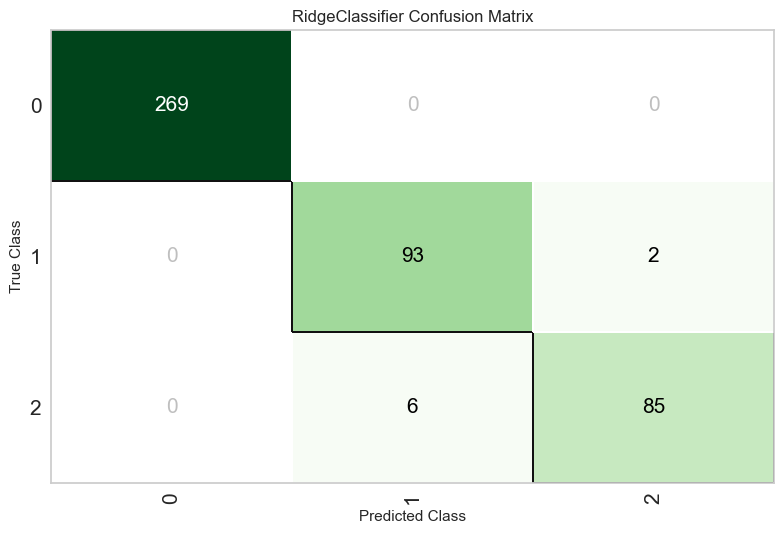

In [22]:
# Generate confusion matrix
confusion_matrix = plot_model(tuned_models[2], plot='confusion_matrix')

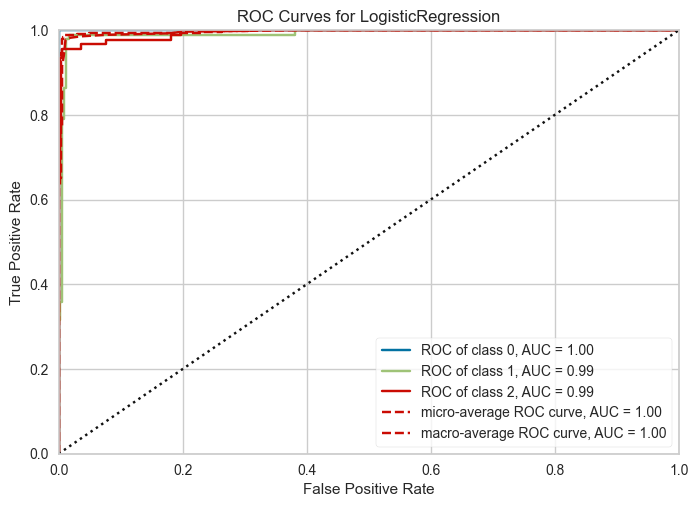

In [23]:
# Generate ROC curve
roc_curve = plot_model(tuned_models[0], plot='auc')


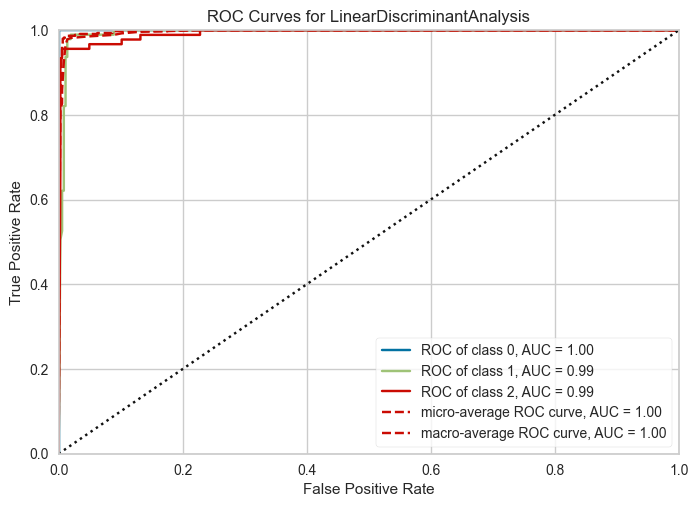

In [26]:
roc_curve = plot_model(tuned_models[1], plot='auc')

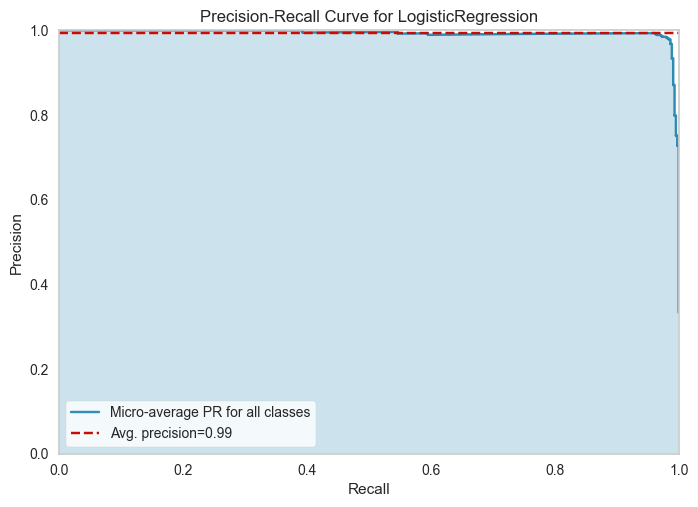

In [28]:
# Generate Precision-Recall curve
pr_curve = plot_model(tuned_models[0], plot='pr')


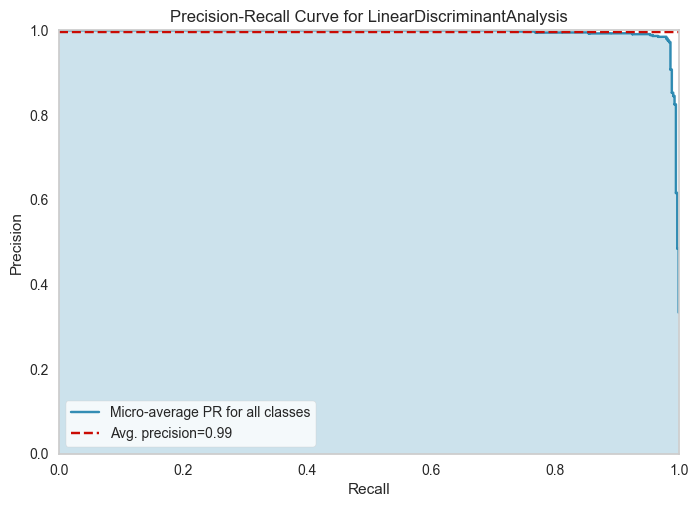

In [29]:
# Generate Precision-Recall curve
pr_curve = plot_model(tuned_models[1], plot='pr')

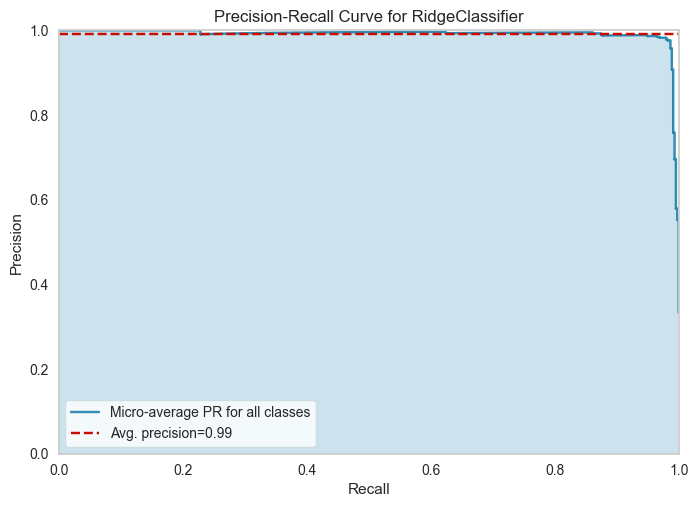

In [30]:
# Generate Precision-Recall curve
pr_curve = plot_model(tuned_models[2], plot='pr')

In [32]:
# List of top 3 tuned models
top_tuned_models = [tune_model(model) for model in best_models]

# Blend the top models into an ensemble
ensemble_model = blend_models(estimator_list=top_tuned_models)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9906,0.9991,0.9906,0.9910,0.9906,0.9833,0.9834
1,0.9623,0.9975,0.9623,0.9681,0.9619,0.9331,0.9355
2,0.9906,0.9998,0.9906,0.9910,0.9906,0.9833,0.9834
3,0.9811,0.9993,0.9811,0.9811,0.9811,0.9666,0.9666
4,0.9811,0.9981,0.9811,0.9828,0.9811,0.9666,0.9672
5,0.9906,1.0000,0.9906,0.9910,0.9906,0.9833,0.9834
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9906,0.9985,0.9906,0.9910,0.9906,0.9835,0.9837


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9906,0.0000,0.9906,0.9910,0.9906,0.9833,0.9834
1,0.9623,0.0000,0.9623,0.9681,0.9619,0.9331,0.9355
2,0.9906,0.0000,0.9906,0.9910,0.9906,0.9833,0.9834
3,0.9717,0.0000,0.9717,0.9721,0.9717,0.9499,0.9500
4,0.9811,0.0000,0.9811,0.9828,0.9811,0.9666,0.9672
5,0.9906,0.0000,0.9906,0.9910,0.9906,0.9833,0.9834
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9906,0.0000,0.9906,0.9910,0.9906,0.9835,0.9837


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9906,0.0000,0.9906,0.9910,0.9906,0.9833,0.9834
1,0.9623,0.0000,0.9623,0.9681,0.9619,0.9331,0.9355
2,0.9906,0.0000,0.9906,0.9910,0.9906,0.9833,0.9834
3,0.9717,0.0000,0.9717,0.9721,0.9717,0.9499,0.9500
4,0.9811,0.0000,0.9811,0.9828,0.9811,0.9666,0.9672
5,0.9906,0.0000,0.9906,0.9910,0.9906,0.9833,0.9834
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9906,0.0000,0.9906,0.9910,0.9906,0.9835,0.9837


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [36]:
predictions = predict_model(ensemble_model)
print(classification_report(predictions['X_primary_disease'], predictions['prediction_label']))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9846,0,0.9846,0.9851,0.9846,0.9729,0.9731


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       0.94      0.99      0.96        95
           2       0.99      0.93      0.96        91

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.99      0.98      0.98       455



In [37]:
test_data_transpose = pd.read_csv("test_data_transpose.csv")
test_data_transpose.head()

,A2ML1,ABCA12,ACHE,ADIPOQ,ADRA2A,AK5,AKR1B15,AKR7A3,ALDH1A1,ALDH1L1,...,WDR49,WDR72,WFDC5,WT1,XK,XKRX,ZNF454,ZNF488,ZNHIT2,ZSCAN23
0,9.02,9.60,2.32,0.0,4.69,2.04,4.88,2.66,13.39,5.81,...,2.32,10.18,4.92,6.36,6.26,4.09,1.87,5.02,7.75,5.91
1,11.08,8.88,7.23,0.0,4.34,0.49,2.35,5.06,11.75,5.26,...,3.82,11.25,7.33,1.15,7.49,4.45,4.50,7.21,7.49,6.24
2,13.00,9.08,6.71,0.0,5.72,2.88,6.32,3.84,9.47,10.71,...,4.52,10.05,7.77,6.00,5.99,5.82,2.49,8.32,7.19,3.51
3,8.50,7.78,9.65,0.0,4.28,1.37,6.23,4.50,10.03,8.21,...,0.00,10.87,5.38,2.98,7.29,3.32,1.04,7.70,7.44,1.37
4,8.46,4.70,8.97,0.0,4.93,0.00,0.93,4.00,10.19,4.80,...,3.13,9.44,6.74,4.04,7.90,5.74,0.93,5.92,8.43,6.15


In [45]:
predictions_ensemble = predict_model(ensemble_model, data=test_data_transpose)

In [47]:
predictions_ensemble

,A2ML1,ABCA12,ACHE,ADIPOQ,ADRA2A,AK5,AKR1B15,AKR7A3,ALDH1A1,ALDH1L1,...,WDR72,WFDC5,WT1,XK,XKRX,ZNF454,ZNF488,ZNHIT2,ZSCAN23,prediction_label
0,9.02,9.60,2.32,0.00,4.69,2.04,4.88,2.66,13.39,5.81,...,10.18,4.92,6.36,6.26,4.09,1.87,5.02,7.75,5.91,2
1,11.08,8.88,7.23,0.00,4.34,0.49,2.35,5.06,11.75,5.26,...,11.25,7.33,1.15,7.49,4.45,4.50,7.21,7.49,6.24,2
2,13.00,9.08,6.71,0.00,5.72,2.88,6.32,3.84,9.47,10.71,...,10.05,7.77,6.00,5.99,5.82,2.49,8.32,7.19,3.51,2
3,8.50,7.78,9.65,0.00,4.28,1.37,6.23,4.50,10.03,8.21,...,10.87,5.38,2.98,7.29,3.32,1.04,7.70,7.44,1.37,2
4,8.46,4.70,8.97,0.00,4.93,0.00,0.93,4.00,10.19,4.80,...,9.44,6.74,4.04,7.90,5.74,0.93,5.92,8.43,6.15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,5.54,7.95,2.60,3.36,7.86,4.29,1.82,6.54,8.04,0.00,...,3.48,0.00,3.68,8.25,2.79,3.77,0.00,5.19,4.09,0
596,5.76,7.30,5.06,3.90,9.37,10.77,1.55,6.80,8.99,2.39,...,0.82,0.47,4.20,5.40,4.26,3.65,3.19,7.78,2.76,0
597,0.98,3.58,2.70,5.93,5.68,6.06,0.00,10.77,7.30,4.04,...,5.45,0.00,3.46,1.96,2.90,2.90,0.72,5.52,1.96,0
598,0.38,6.78,1.89,2.10,6.80,5.02,1.89,7.75,7.68,1.63,...,6.61,0.00,3.04,1.49,3.14,3.86,0.38,6.78,3.04,0


In [48]:
print("prediction from esnsemble classifier: \n",predictions_ensemble['prediction_label'].value_counts())

prediction from esnsemble classifier: 
 1    211
0    199
2    190
Name: prediction_label, dtype: int64


In [49]:
predictions_logistic = predict_model(tuned_models[0], data=test_data_transpose)

In [50]:
print("prediction from Logistic regressor classifier: \n",predictions_logistic['prediction_label'].value_counts())

prediction from Logistic regressor classifier: 
 1    207
0    200
2    193
Name: prediction_label, dtype: int64


In [51]:
compare_data = pd.DataFrame({"ensemble_Prediction": predictions_ensemble['prediction_label'],
"logistic_predictions": predictions_logistic['prediction_label']})
compare_data.head()

,ensemble_Prediction,logistic_predictions
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2


In [52]:
# Add a new column to store the comparison result
compare_data['Comparison'] = ''

# Compare predictions and update the comparison column
match_count = 0  # Initialize match count
for index, row in compare_data.iterrows():
    if row['ensemble_Prediction'] == row['logistic_predictions']:
        compare_data.at[index, 'Comparison'] = 'Match'
        match_count += 1  # Increment match count

# Calculate the percentage of match data
total_rows = len(compare_data)
percentage_match = (match_count / total_rows) * 100

print(f"Percentage of Match Data: {percentage_match:.2f}%")

Percentage of Match Data: 99.33%


Also, Pycaret helps in finding the feature importance too:

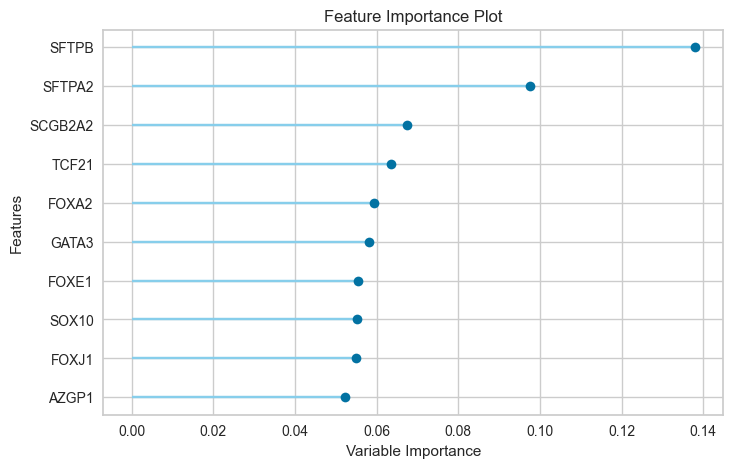

In [57]:
# feature importance from Logistic regression
plot_model(tuned_models[0], plot='feature')

Saving the final prediction

In [53]:
test_data = pd.read_csv("test_data.tsv",sep="\t")
test_data.head()

,Unnamed: 0,S1,S1001,S1005,S1006,S1012,S1020,S1021,S1037,S1039,...,S133,S1332,S1333,S1334,S1335,S1336,S1337,S1338,S134,S1342
0,A1BG,7.60,6.84,6.12,5.86,6.05,5.62,6.00,5.74,6.71,...,8.22,6.77,7.62,6.73,5.66,6.11,6.90,7.95,6.03,5.89
1,A1CF,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.07,0.32,0.00,0.00,0.00,0.00,0.00
2,A2M,12.28,12.27,12.55,10.79,11.80,9.82,10.88,11.42,12.05,...,11.97,14.42,11.95,12.91,13.77,12.96,13.87,13.20,13.75,13.11
3,A2ML1,9.02,11.08,13.00,8.50,8.46,6.18,14.59,10.08,10.11,...,0.98,0.59,0.53,7.20,9.76,5.54,5.76,0.98,0.38,10.73
4,A4GALT,10.47,8.06,10.97,10.98,8.77,9.18,10.88,12.00,9.80,...,9.00,9.44,5.67,7.46,6.74,7.07,9.28,7.74,7.28,5.53


In [54]:
test_data_transpose = test_data.T
test_data_transpose.rename(columns=test_data_transpose.iloc[0],inplace = True)
test_data_transpose.drop(test_data_transpose.index[0], inplace = True)
test_data_transpose.reset_index(inplace = True)
test_data_transpose.head()

,index,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,S1,7.6,0.53,12.28,9.02,10.47,1.69,9.77,9.69,5.66,...,8.23,8.77,6.81,8.83,11.08,3.7,9.52,10.59,10.27,10.53
1,S1001,6.84,0.0,12.27,11.08,8.06,0.49,9.8,9.2,10.47,...,9.78,9.78,5.11,8.14,11.99,3.77,8.9,11.79,9.81,9.52
2,S1005,6.12,0.0,12.55,13.0,10.97,2.16,9.5,10.62,7.22,...,8.58,10.5,5.09,8.33,10.52,3.95,10.01,11.38,10.31,9.29
3,S1006,5.86,0.0,10.79,8.5,10.98,0.0,9.71,8.72,7.06,...,9.55,10.73,4.24,8.22,10.41,5.32,8.98,12.91,9.9,9.59
4,S1012,6.05,0.0,11.8,8.46,8.77,0.0,10.08,10.21,3.87,...,8.51,10.17,6.43,8.93,10.7,7.26,9.71,11.55,9.98,9.86


In [55]:
pd.DataFrame({"Id":test_data_transpose["index"],"label": predictions_ensemble["prediction_label"]})

,Id,label
0,S1,2
1,S1001,2
2,S1005,2
3,S1006,2
4,S1012,2
...,...,...
595,S1336,0
596,S1337,0
597,S1338,0
598,S134,0


In [56]:
pd.DataFrame({"Id":test_data_transpose["index"],"label": predictions_ensemble["prediction_label"]}).to_csv("ML_predict_Kiran_Franklin.csv",index=False)

# Save and load model

In [59]:
# saving model 

save_model(ensemble_model, 'saved_ensemble_model') 

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\KIRAN~1.FRA\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['A2ML1', 'ABCA12', 'ACHE',
                                              'ADIPOQ', 'ADRA2A', 'AK5',
                                              'AKR1B15', 'AKR7A3', 'ALDH1A1',
                                              'ALDH1L1', 'ALDH3A1', 'ANKS1B',
                                              'ANPEP', 'APOC2', 'AZGP1',
                                              'BCL2L10', 'BPI', 'C10orf82',
                                              'C5orf46', 'C7', 'CA8', 'CACNG4',
                                              'CALML3', '...
                                                                           n_components=None,
                                                                           priors=None,
                                                  

In [60]:
saved_ensemble_model = load_model('saved_ensemble_model') 

Transformation Pipeline and Model Successfully Loaded
